<a href="https://colab.research.google.com/github/jtrahan1029/jtrahan1029/blob/main/sup_text_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project for Supervised Text Analytics

In this project I demonstrated that my model can perform at 94% precision. This means that the model has highly efficient at identifying positive cases! While this was my primary metric, it is worth noting that my best model has a recall of 98%

### Importing my packages and modules

In [1]:
import os
import tensorflow as tf
print(tf.__version__)
try:
  import ktrain
except:
  !pip install ktrain
  os.kill(os.getpid(), 9)
from ktrain.text import texts_from_df
import pandas as pd
import json
import numpy as np

2.15.0


Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Here I used some of the code that I wrote in week one to load the data from a drive file

In [3]:
data = []
with open('/content/drive/MyDrive/Colab Notebooks/files/news_category_trainingdata.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

### I made two predictor columns
One column concatenated the the headline only and the other included the link. My final results were acheived by using the combined_link predictor.

In [4]:
df = pd.DataFrame(data[0])
df['combined'] = df['headline'] + ' ' + df['short_description']
df['combined_link'] = df['headline'] + ' ' + df['short_description'] + ' ' + df['link']

In [5]:
df.head()

,category,headline,authors,link,short_description,date,combined,combined_link
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,Julianna Margulies Uses Donald Trump Poop Bags...


### Code used from course materials. I liked the simplicity and efficiency of this approach

In [31]:
df['HL'] = np.where((df['category'] == 'HEALTHY LIVING'), 1,0)

In [33]:
df[df['HL'] == 1].head()

,category,headline,authors,link,short_description,date,combined,combined_link,label,HL
7578,HEALTHY LIVING,To The People Who Say ‘I’m Tired’ When Someone...,"The Mighty, ContributorWe face disability, dis...",https://www.huffingtonpost.com/entry/to-the-pe...,"When you feel like this, it’s important to kno...",2018-01-16,To The People Who Say ‘I’m Tired’ When Someone...,To The People Who Say ‘I’m Tired’ When Someone...,1,1
7693,HEALTHY LIVING,Eating Shake Shack Made Me Feel Healthier Than...,"Colleen Werner, ContributorCampus Editor-at-Large",https://www.huffingtonpost.com/entry/eating-sh...,I can vividly remember the first time I felt f...,2018-01-12,Eating Shake Shack Made Me Feel Healthier Than...,Eating Shake Shack Made Me Feel Healthier Than...,1,1
7747,HEALTHY LIVING,How To Stay Updated On The News Without Losing...,Lindsay Holmes,https://www.huffingtonpost.com/entry/anxiety-f...,Because it's only becoming more of a struggle.,2018-01-12,How To Stay Updated On The News Without Losing...,How To Stay Updated On The News Without Losing...,1,1
7927,HEALTHY LIVING,27 Perfect Tweets About Whole30 That Will Make...,Lindsay Holmes,https://www.huffingtonpost.com/entry/tweets-ab...,"""The only Whole30 I want to participate in is ...",2018-01-10,27 Perfect Tweets About Whole30 That Will Make...,27 Perfect Tweets About Whole30 That Will Make...,1,1
7934,HEALTHY LIVING,The Real Reason Your Hands Are Always Cold,"Refinery29, ContributorThe #1 new-media brand ...",https://www.huffingtonpost.com/entry/the-real-...,"Essentially, your hands are kept warm thanks t...",2018-01-10,The Real Reason Your Hands Are Always Cold Ess...,The Real Reason Your Hands Are Always Cold Ess...,1,1


### Code used from course materials. I liked the simplicity and efficiency of this approach

In [34]:
neg_sample = len(df[df['HL'] == 1])

pos = df[df['HL'] == 1]
neg = df[df['HL'] == 0].sample(neg_sample)

data = pd.concat([pos, neg])

data.head()

,category,headline,authors,link,short_description,date,combined,combined_link,label,HL
7578,HEALTHY LIVING,To The People Who Say ‘I’m Tired’ When Someone...,"The Mighty, ContributorWe face disability, dis...",https://www.huffingtonpost.com/entry/to-the-pe...,"When you feel like this, it’s important to kno...",2018-01-16,To The People Who Say ‘I’m Tired’ When Someone...,To The People Who Say ‘I’m Tired’ When Someone...,1,1
7693,HEALTHY LIVING,Eating Shake Shack Made Me Feel Healthier Than...,"Colleen Werner, ContributorCampus Editor-at-Large",https://www.huffingtonpost.com/entry/eating-sh...,I can vividly remember the first time I felt f...,2018-01-12,Eating Shake Shack Made Me Feel Healthier Than...,Eating Shake Shack Made Me Feel Healthier Than...,1,1
7747,HEALTHY LIVING,How To Stay Updated On The News Without Losing...,Lindsay Holmes,https://www.huffingtonpost.com/entry/anxiety-f...,Because it's only becoming more of a struggle.,2018-01-12,How To Stay Updated On The News Without Losing...,How To Stay Updated On The News Without Losing...,1,1
7927,HEALTHY LIVING,27 Perfect Tweets About Whole30 That Will Make...,Lindsay Holmes,https://www.huffingtonpost.com/entry/tweets-ab...,"""The only Whole30 I want to participate in is ...",2018-01-10,27 Perfect Tweets About Whole30 That Will Make...,27 Perfect Tweets About Whole30 That Will Make...,1,1
7934,HEALTHY LIVING,The Real Reason Your Hands Are Always Cold,"Refinery29, ContributorThe #1 new-media brand ...",https://www.huffingtonpost.com/entry/the-real-...,"Essentially, your hands are kept warm thanks t...",2018-01-10,The Real Reason Your Hands Are Always Cold Ess...,The Real Reason Your Hands Are Always Cold Ess...,1,1


In [35]:
len(data)

13388

### I stuck with the distilbert preprocessing model as well as the single n-gram for my base model. I was pleased with the ngram_range = 1 and I figure it is the simpler model. Since the distilbert model has proven to be effective, my next model will adjust the ngram_range for a tuning adjustment.

In [36]:
train, val, preprocess = texts_from_df(data, 'combined_link', label_columns=['HL'], val_df=None, max_features=20000,
                                       maxlen=512, val_pct=0.1, ngram_range=1, preprocess_mode='distilbert', verbose=1)

['not_HL', 'HL']
        not_HL   HL
66581      0.0  1.0
119941     1.0  0.0
92565      0.0  1.0
93270      0.0  1.0
21576      0.0  1.0
['not_HL', 'HL']
        not_HL   HL
29405      0.0  1.0
175299     1.0  0.0
91542      0.0  1.0
94668      1.0  0.0
8341       1.0  0.0
preprocessing train...
language: en
train sequence lengths:
	mean : 30
	95percentile : 60
	99percentile : 72


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 30
	95percentile : 60
	99percentile : 72


In [9]:
model = preprocess.get_classifier()
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=16)

### Just as in class, loss was minimized at .0001

In [10]:
learner.lr_find(max_epochs=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/6
753/753 [==============================] - 233s 291ms/step - loss: 0.6453 - accuracy: 0.6351
Epoch 2/6
753/753 [==============================] - 222s 294ms/step - loss: 0.2563 - accuracy: 0.9048
Epoch 3/6
753/753 [==============================] - 221s 294ms/step - loss: 0.3857 - accuracy: 0.7943
Epoch 4/6
753/753 [==============================] - 221s 293ms/step - loss: 0.6949 - accuracy: 0.4962
Epoch 5/6
753/753 [==============================] - 58s 77ms/step - loss: 17.6789 - accuracy: 0.4948


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


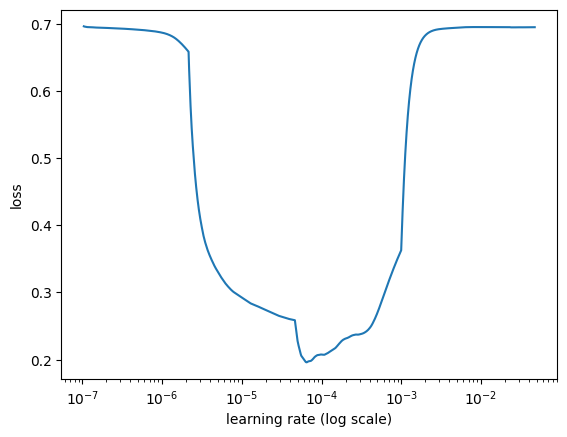

In [11]:
learner.lr_plot()

In [12]:
hist = learner.autofit(1e-4,checkpoint_folder='/content/drive/MyDrive/checkpoint',epochs=12, early_stopping=True)



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/12
754/754 [==============================] - 236s 300ms/step - loss: 0.2707 - accuracy: 0.8922 - val_loss: 0.2142 - val_accuracy: 0.9208
Epoch 2/12
754/754 [==============================] - 224s 297ms/step - loss: 0.1387 - accuracy: 0.9543 - val_loss: 0.2171 - val_accuracy: 0.9223
Epoch 2: early stopping
Weights from best epoch have been loaded into model.


In [13]:
predictor = ktrain.get_predictor(learner.model, preproc=preprocess)

In [14]:
predictor.save("drive/MyDrive/final")

## Given that I want to present relevant articles to customers, I chose precision as my performance measure. Using the text column without the link yielded 84% precision. Using the link text in my predictor data increased precision to 89%.

### This means that my first model can identify 89% of healthy living articles correctly.

In [15]:
validation = learner.validate(val_data=val, print_report=True)

42/42 [==============================] - 5s 76ms/step
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       664
           1       0.89      0.96      0.92       675

    accuracy                           0.92      1339
   macro avg       0.92      0.92      0.92      1339
weighted avg       0.92      0.92      0.92      1339



In [ ]:
!pip install https://github.com/amaiya/eli5-tf/archive/refs/heads/master.zip

     | 6.9 MB 12.5 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=108157 sha256=bf8cd99a20ee3e097c86c8acedbc64da4cf42f112c9c3531505ede4adc81d62d
  Stored in directory: /tmp/pip-ephem-wheel-cache-10hxypww/wheels/0b/14/54/23c07f7254b733dc3daac99ba1fda60e30f1b2991b3b8ee0bf
Successfully built eli5


## Testing the predictor

In [ ]:
predictor.explain('the goal is the eat the right foods')

In [ ]:
learner.view_top_losses(n=10, preproc=preprocess)

42/42 [==============================] - 3s 62ms/step
----------
id:788 | loss:5.28 | true:label | pred:not_label)

----------
id:702 | loss:4.33 | true:label | pred:not_label)

----------
id:549 | loss:4.24 | true:not_label | pred:label)

----------
id:1172 | loss:4.01 | true:not_label | pred:label)

----------
id:656 | loss:3.99 | true:not_label | pred:label)

----------
id:690 | loss:3.95 | true:not_label | pred:label)

----------
id:887 | loss:3.86 | true:not_label | pred:label)

----------
id:318 | loss:3.81 | true:not_label | pred:label)

----------
id:173 | loss:3.65 | true:label | pred:not_label)

----------
id:608 | loss:3.62 | true:not_label | pred:label)



## My next model (below) will adjust the ngram parameter to two instead of one. While testing my base models predictions, I noticed that words like food were negatively correlated with the healthy living label. Bigrams may help differientiate between 'health food' and the word 'food' itself by adjusting for context.

In [37]:
train2, val2, preprocess2 = texts_from_df(data, 'combined_link', label_columns=['HL'], val_df=None, max_features=20000,
                                       maxlen=512, val_pct=0.1, ngram_range=2, preprocess_mode='distilbert', verbose=1)

['not_HL', 'HL']
        not_HL   HL
102030     0.0  1.0
14683      1.0  0.0
104253     0.0  1.0
99497      1.0  0.0
43202      0.0  1.0
['not_HL', 'HL']
        not_HL   HL
89605      0.0  1.0
128723     1.0  0.0
96937      0.0  1.0
122357     0.0  1.0
7447       1.0  0.0
preprocessing train...
language: en
train sequence lengths:
	mean : 30
	95percentile : 60
	99percentile : 72


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 30
	95percentile : 59
	99percentile : 70


In [21]:
model2 = preprocess2.get_classifier()
learner2 = ktrain.get_learner(model2, train_data=train2, val_data=val2, batch_size=16)

In [22]:
learner2.lr_find(max_epochs=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/6
753/753 [==============================] - 230s 292ms/step - loss: 0.5867 - accuracy: 0.7098
Epoch 2/6
753/753 [==============================] - 222s 295ms/step - loss: 0.2421 - accuracy: 0.9075
Epoch 3/6
753/753 [==============================] - 222s 294ms/step - loss: 0.3526 - accuracy: 0.8215
Epoch 4/6
753/753 [==============================] - 221s 293ms/step - loss: 0.6971 - accuracy: 0.5091
Epoch 5/6
753/753 [==============================] - 35s 47ms/step - loss: 1.3686 - accuracy: 0.4872


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


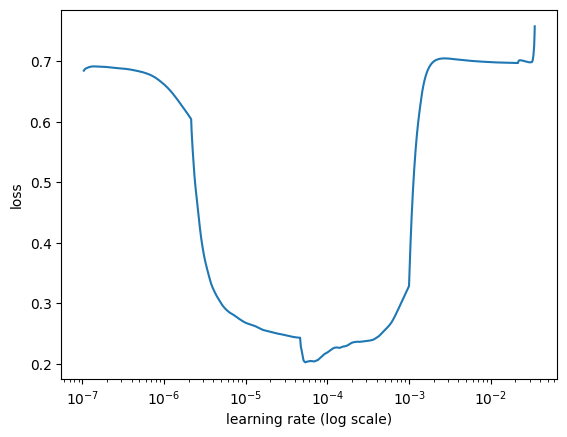

In [24]:
learner2.lr_plot()

In [25]:
hist2 = learner2.autofit(1e-4,checkpoint_folder='/content/drive/MyDrive/checkpoint2',epochs=12, early_stopping=True)



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/12
754/754 [==============================] - 237s 301ms/step - loss: 0.2704 - accuracy: 0.8889 - val_loss: 0.1943 - val_accuracy: 0.9276
Epoch 2/12
754/754 [==============================] - 225s 298ms/step - loss: 0.1236 - accuracy: 0.9580 - val_loss: 0.2113 - val_accuracy: 0.9186
Epoch 2: early stopping
Weights from best epoch have been loaded into model.


In [27]:
predictor2 = ktrain.get_predictor(learner2.model, preproc=preprocess2)

## Not only did my adjusted model outperform my first model, It performs extremely well correctly identifying 94% of healthy living articles.

In [29]:
validation2 = learner2.validate(val_data=val, print_report=True)

42/42 [==============================] - 5s 75ms/step
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       664
           1       0.94      0.98      0.96       675

    accuracy                           0.96      1339
   macro avg       0.96      0.96      0.96      1339
weighted avg       0.96      0.96      0.96      1339

